In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [8]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = df.drop('target', axis = 1)
y = df.target

In [11]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.33, random_state = 42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9285714285714286, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.07142857142

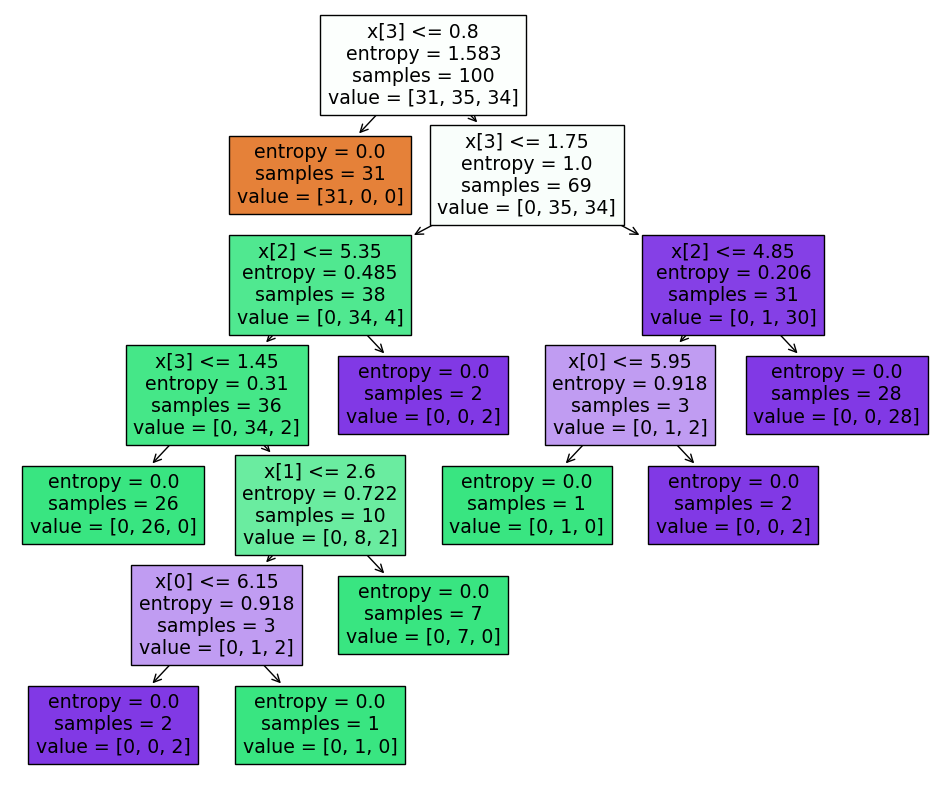

In [16]:
from sklearn import tree

plt.figure(figsize = (12, 10))
tree.plot_tree(dtc, filled = True)

## Post Prunning

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

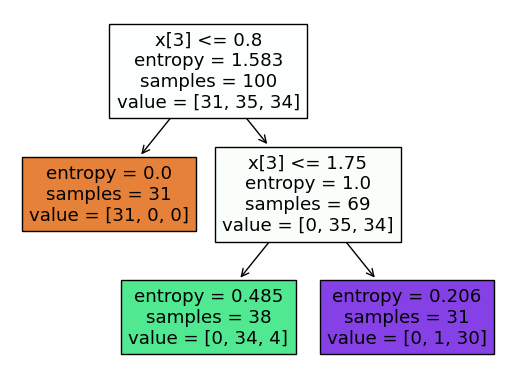

In [21]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
dtc.fit(X_train, y_train)
y_test_prediction = dtc.predict(X_test)

tree.plot_tree(dtc, filled = True)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_test_prediction))
print(accuracy_score(y_test, y_test_prediction))
print(classification_report(y_test, y_test_prediction))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Decision Tree Pre Prunning And Hyperparameter Tunning for Huge Data

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [27]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(dtc, param_grid = params, cv = 5, scoring = 'accuracy')
clf.fit(X_train, y_train)
y_test_prediction = clf.predict(X_test)

print("Best Parameters:", clf.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'random'}


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_test_prediction))
print(accuracy_score(y_test, y_test_prediction))
print(classification_report(y_test, y_test_prediction))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

